In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
excelDoc = pd.read_excel("Dummy Data.xlsx", sheet_name = ["USE THIS"])
data = excelDoc["USE THIS"]
data.set_index("Client", inplace = True)
data

,Existing client,Value of Estate,Beneficiaries,Multiple national jurisdictions,Testementary Trust,Claims expected against estate,Cost
Client,,,,,,,
1,1,500000,5,0,0,0,65005.25
2,1,200000,2,0,0,0,19001.58
3,1,1000000,7,0,0,0,135007.91
4,1,600000,6,0,1,1,99006.72
5,1,450000,13,0,0,0,58014.04
6,1,10000000,3,1,0,1,1525002.55
7,1,1437000,4,0,1,1,216183.36
8,1,5509000,11,1,1,1,806272.43
9,1,8863000,4,1,1,1,1187193.48


# SKLearn regression calculation

In [3]:
excelDoc = pd.read_excel("Dummy Data.xlsx", sheet_name = ["USE THIS"])
data = excelDoc["USE THIS"]
data.set_index("Client", inplace = True)

In [4]:
# Set up the independent variables

independentVars = data.loc[:, data.columns != 'Cost']
independentVars

,Existing client,Value of Estate,Beneficiaries,Multiple national jurisdictions,Testementary Trust,Claims expected against estate
Client,,,,,,
1,1,500000,5,0,0,0
2,1,200000,2,0,0,0
3,1,1000000,7,0,0,0
4,1,600000,6,0,1,1
5,1,450000,13,0,0,0
6,1,10000000,3,1,0,1
7,1,1437000,4,0,1,1
8,1,5509000,11,1,1,1
9,1,8863000,4,1,1,1


In [5]:
# Set up the dependent variable

dependentVar = data["Cost"]

In [6]:
# Fit a model
lm = linear_model.LinearRegression()
model = lm.fit(independentVars, dependentVar)

In [7]:
predictions = lm.predict(independentVars)
print(predictions[0:5])

[ 78788.72782269  45876.40637196 139954.5570231   79100.05027978
  55419.45391927]


In [8]:
# Find the R^2 score of the model
lm.score(independentVars, dependentVar)

0.9279125663507735

In [9]:
# Output the coefficients of the model
lm.coef_
lm.coef_.size

6

In [10]:
# Output the intercept of the model
lm.intercept_

36335.04274916055

# Comparing the model to the data

In [11]:
def fullmodel(case):
    estimate = lm.intercept_
    for i in range(len(lm.coef_)):
        estimate = estimate + case[i] * lm.coef_[i]
    
    return estimate

# client, estate, beneficiaries, juristictions, caseType, claims
case = [1, 500000, 0, 0, 0, 0]
fullmodel(case)

case = [1, 200000, 2, 0, 0, 0]
fullmodel(case)

45876.40637195834

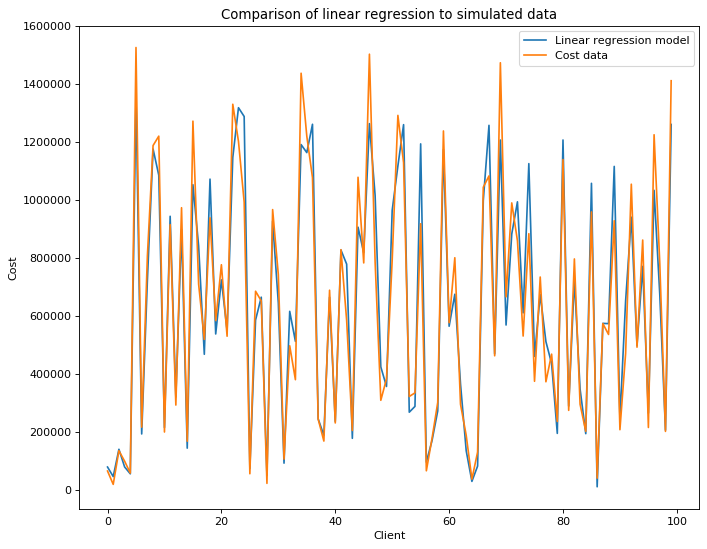

In [18]:
# Calculate the model's estimate for each client
estimates = [None] * int(data["Cost"].count())

data.iloc[1].to_list()

for i in range(data["Cost"].count()):
    estimates[i] = fullmodel(data.iloc[i].to_list())
    
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(estimates, label = "Linear regression model")
plt.plot(data["Cost"].values, label = "Cost data")
plt.title('Comparison of linear regression to simulated data')
plt.xlabel("Client")
plt.ylabel("Cost")
plt.legend(loc = 'upper right')

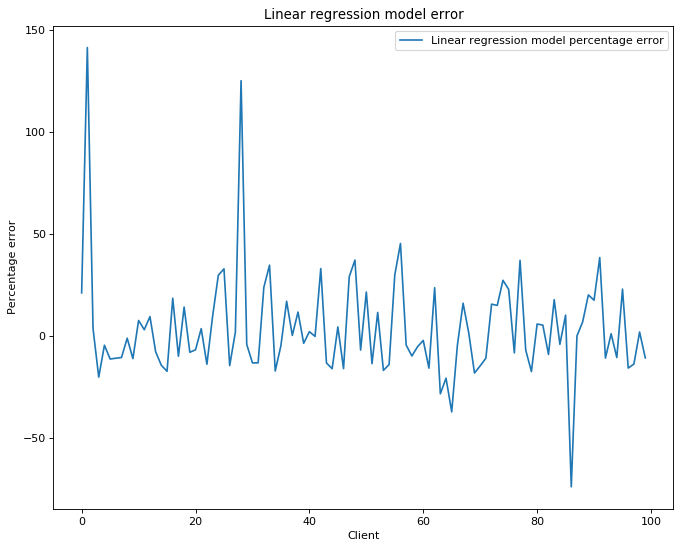

In [17]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(100*(estimates-data["Cost"].values)/data["Cost"].values, label = "Linear regression model percentage error")
plt.title('Linear regression model error')
plt.xlabel("Client")
plt.ylabel("Percentage error")
plt.legend(loc = 'upper right')

In [14]:
print("The average percentage error is", (100*(estimates-data["Cost"].values)/data["Cost"].values).mean())

The average percentage error is 3.6869292425589255


# statsmodel regression calculation

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets

In [16]:
independentVars = data.loc[:, data.columns != 'Cost']
dependentVar = data["Cost"]

model = sm.OLS(dependentVar, independentVars).fit()
predictions = model.predict(independentVars)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Cost   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              701.7
Date:                Sun, 13 Oct 2019   Prob (F-statistic):                    9.89e-76
Time:                        15:09:40   Log-Likelihood:                         -1305.1
No. Observations:                 100   AIC:                                      2622.
Df Residuals:                      94   BIC:                                      2638.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Existing client                 -4705.6523   2.21e+04     -0.213      0.832   -4.86e+04    3.92e+04
Value of Estate                     0.1329      0.004     34.634      0.000       0.125       0.141
Beneficiaries                    -436.8740   2218.060     -0.197      0.844   -4840.884    3967.136
Multiple national jurisdictions  8485.1255   3.31e+04      0.257      0.798   -5.72e+04    7.41e+04
Testementary Trust              -2.295e+04   2.33e+04     -0.984      0.328   -6.93e+04    2.34e+04
Claims expected against estate   2.489e+04   2.23e+04      1.114      0.268   -1.95e+04    6.92e+04
==============================================================================
Omnibus:                        2.441   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.907
Skew:                          -0.320   Prob(JB):                        0.385
Kurtosis:                       3.217   Cond. No.                     1.62e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""